## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)

(545, 13)


In [3]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [4]:
#4 Check for missing  values if any, replace with appropriate values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop('price',axis=1)
print(x)
y=df['price']
print(y)


     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

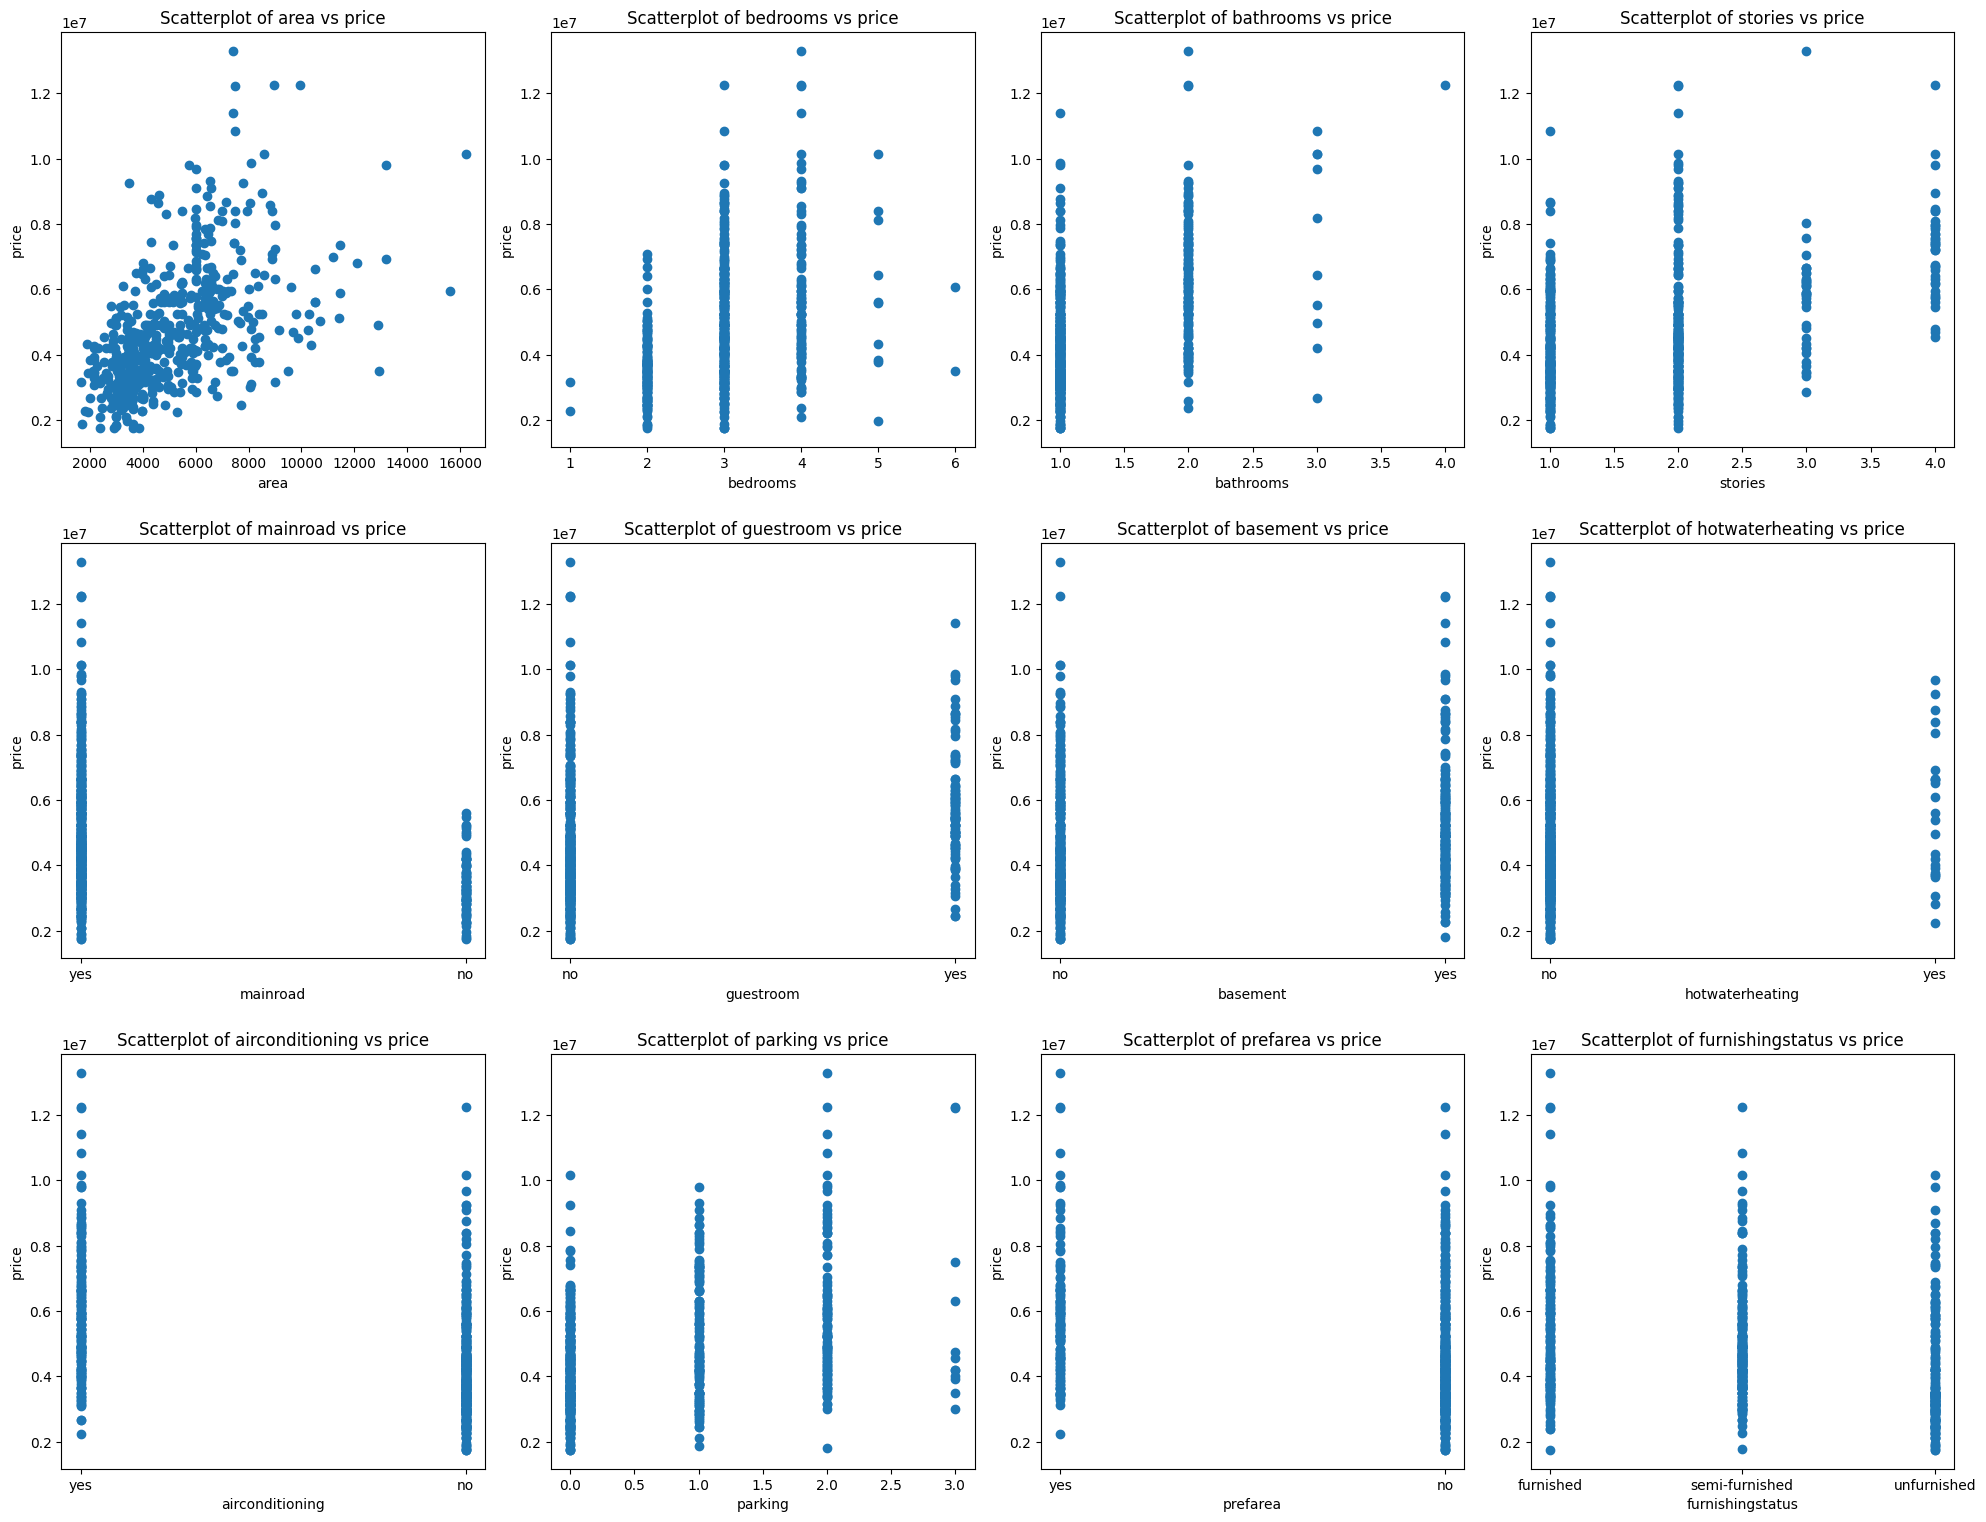

In [6]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
x_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
y_vars='price'
plt.figure(figsize=(20,20))
for i,vars in enumerate(x_vars):
  plt.subplot(4,4,i+1)
  plt.scatter(df[vars],df[y_vars])
  plt.xlabel(vars)
  plt.ylabel('price')
  plt.title('Scatterplot of '+vars+' vs price')
  
plt.tight_layout()
plt.show()





In [7]:
print(x.columns)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


In [8]:
#7 Encoding categorical data in X
x = pd.get_dummies(x, columns=['furnishingstatus'], drop_first=True)
print(x)



     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea  \
0                no             yes        2      yes   
1                no             y

In [9]:
#8  Avoiding the Dummy Variable Trap
x=pd.get_dummies(x,drop_first=True)
print(x)

     area  bedrooms  bathrooms  stories  parking  \
0    7420         4          2        3        2   
1    8960         4          4        4        3   
2    9960         3          2        2        2   
3    7500         4          2        2        3   
4    7420         4          1        2        2   
..    ...       ...        ...      ...      ...   
540  3000         2          1        1        2   
541  2400         3          1        1        0   
542  3620         2          1        1        0   
543  2910         3          1        1        0   
544  3850         3          1        2        0   

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
0                              False                         False   
1                              False                         False   
2                               True                         False   
3                              False                         False   
4                        

In [10]:
#9 Apply feature scaling on numerical variables
# apply featue scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)



[[ 1.04672629  1.40341936  1.42181174 ... -0.2192645   1.4726183
   1.80494113]
 [ 1.75700953  1.40341936  5.40580863 ... -0.2192645   1.4726183
  -0.55403469]
 [ 2.21823241  0.04727831  1.42181174 ... -0.2192645  -0.67906259
   1.80494113]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ... -0.2192645  -0.67906259
  -0.55403469]
 [-1.03338891  0.04727831 -0.57018671 ... -0.2192645  -0.67906259
  -0.55403469]
 [-0.5998394   0.04727831 -0.57018671 ... -0.2192645  -0.67906259
  -0.55403469]]


In [13]:
print(x)

[[ 1.04672629  1.40341936  1.42181174 ... -0.2192645   1.4726183
   1.80494113]
 [ 1.75700953  1.40341936  5.40580863 ... -0.2192645   1.4726183
  -0.55403469]
 [ 2.21823241  0.04727831  1.42181174 ... -0.2192645  -0.67906259
   1.80494113]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ... -0.2192645  -0.67906259
  -0.55403469]
 [-1.03338891  0.04727831 -0.57018671 ... -0.2192645  -0.67906259
  -0.55403469]
 [-0.5998394   0.04727831 -0.57018671 ... -0.2192645  -0.67906259
  -0.55403469]]


In [14]:
x.shape

(545, 13)

In [11]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 13)
(164, 13)
(381,)
(164,)


In [12]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)


[ 534765.25318629   94587.4151015   475997.27010638  365169.98636681
  188927.92811153  -33085.64779912 -209032.58499043  166585.25888862
  147328.8198256   168678.55021588  261099.37994585  422315.22196998
  294446.50707212]
4771480.032441168


In [73]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred_train = model.predict(X_train)
error_train = y_pred_train - y_train
print(error_train)

454    1.135258e+06
392    1.223929e+05
231   -7.129574e+05
271   -1.100037e+06
250   -5.896616e+05
           ...     
70    -2.601355e+05
277    1.252991e+06
9     -2.123329e+06
359   -7.642659e+05
192    3.052246e+05
Name: price, Length: 381, dtype: float64


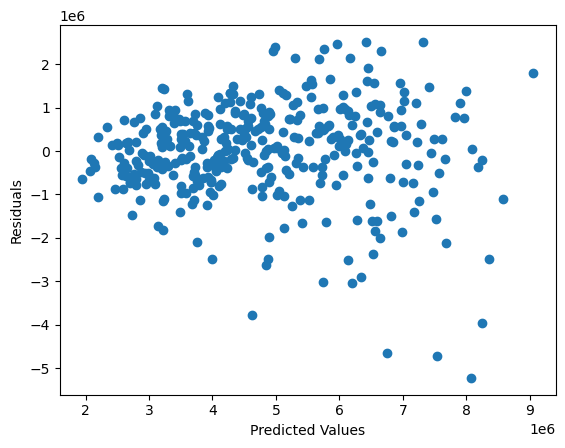

In [74]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_pred_train, error_train)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [75]:
#14  Predic on the test set
y_pred_test = model.predict(X_test)
print(y_pred_test)

[ 3911453.54064883  6143880.8233506   4528631.96120034  7232572.78423665
  2812400.7527595   6934975.94539538  3226876.31570199  3237823.37678729
  3490347.53294594  8191982.66932557  6567357.75729699  3682106.94173899
  3842743.61695773  4517443.56077113  4046655.54296565  1959416.72194198
  4072106.39887932  3701748.56738519  3278156.73230397  4613335.39279989
  5914005.9996049   6364142.04649608  4780192.88051162  2678961.5683878
  5312597.9380594   5656577.20183507  5430554.91520127  5552569.00670161
  5702118.36848693  5824339.78909627  3393388.97841733  6472056.62389447
  7112446.56922111  2925984.41409795  4531135.86406985  5244195.8724648
  5038926.23916229  3740632.18496516  2878434.13401558  3965260.89328848
  7940385.80780388  4886093.89601643  6389754.68707427  3547187.00241672
  3840075.3368073   6396360.28556585  4511778.33005326  2706503.65402798
  4209225.37574164  6470892.31596105  4051522.69214757  7057258.1841684
  2541908.05959835  3038252.93429925  3508086.87675502

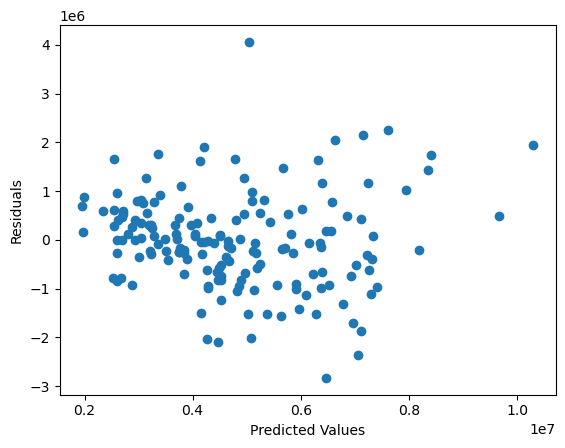

In [77]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_pred_test, y_test - y_pred_test)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [78]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import r2_score,mean_squared_error
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
# Calculate R Squared Value
r2 = r2_score(y_test, y_pred_test)
print("Mean Squared Error:", mse)
print("R Squared Value:", r2)


Mean Squared Error: 955428862101.2494
R Squared Value: 0.7245629970975958


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)